<a href="https://colab.research.google.com/github/NickOLeeney/data-science-projects/blob/main/911_Calls_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Calls Project 

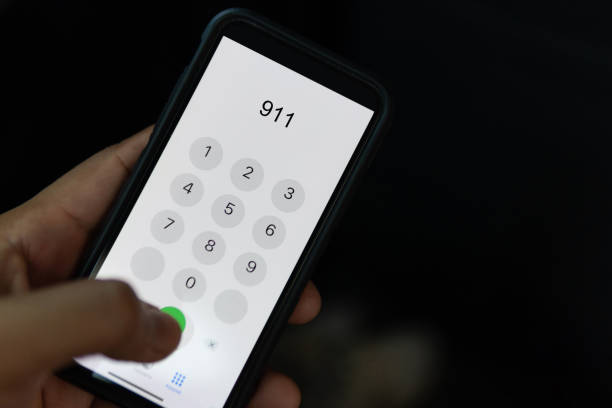


In this project there will be analized some 911 calls data. The dataset was taken from [Kaggle](https://www.kaggle.com/mchirico/montcoalert) and it contains the following fields:

* **lat** : Latitude, *String variable*
* **lng**: Longitude, *String variable*
* **desc**: Description of the Emergency Call, *String variable*
* **zip**: Zipcode, *String variable*
* **title**: Title, *String variable*
* **timeStamp**: YYYY-MM-DD HH:MM:SS, *String variable*
* **twp**: Township, *String variable*
* **addr**: Address, *String variable*
* **e**: Dummy variable (always 1)



## Data and Setup

____
###Imports

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Exploring

In [81]:
df = pd.read_csv('911.csv')

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [83]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [84]:
# top 5 zip codes 
df['zip'].value_counts().head(5) 

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [85]:
# top 5 townships
df['twp'].value_counts().head(5) 

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [86]:
# number of unique reason for 911 calls
df['title'].nunique()  

110

### Adding new features

It could be helpful to split the '*title*' column in order to isolate the reason why the calls were made



In [104]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [105]:
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)


It can be seen that there were only 3 main reasons



In [106]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

The most common cause is EMS: Emergency Medical Services

## Plots

###Countplots

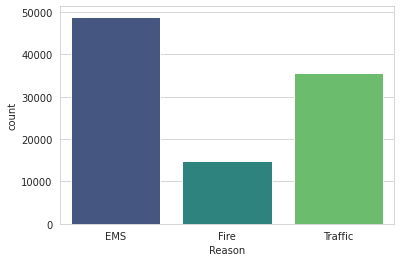

In [66]:
sns.countplot(x='Reason',data=df,palette='viridis')

In [107]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [108]:
# datetime conversion of timeStamp column
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In order to do some time analysis it is convenient to add 3 more time columns from timeStamp: '*Day of week*', '*Month*' and '*Hour*'.

In [109]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [75]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


Converting *day of week* column from integer to a string object

In [43]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

Seaborn's count plots were used to create plots of calls made vs Day of Week column and vs *Month*. In both of cases with the hue based off of the Reason column.

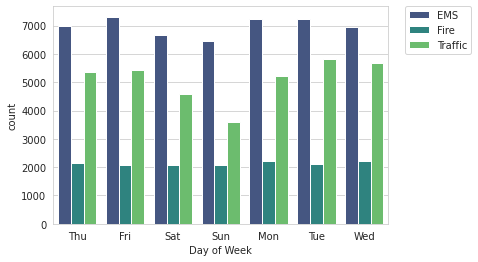

In [45]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

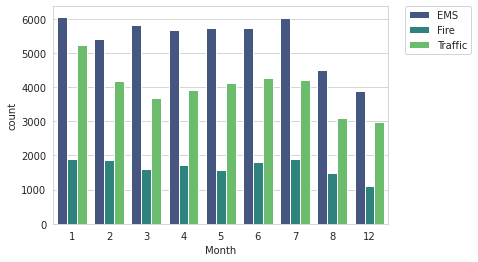

In [46]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

From the plots it can be seen that actually some months are missing. In particular 9, 10, 11. It is possible to have some informations from these missing data through a continuos plot (although interpolated). 

### Continuos plot

In [47]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Text(0, 0.5, 'Counts')

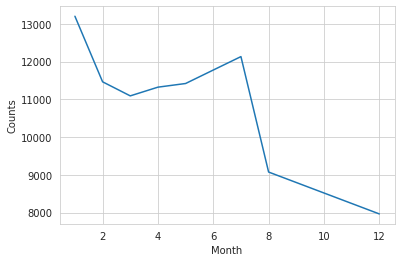

In [79]:
# Linear plot from matplotlib's pyplot
byMonth['twp'].plot()
plt.ylabel('Counts')

Let's see how the counts vary with months through a linear plot

Text(5.174999999999997, 0.5, 'Counts')

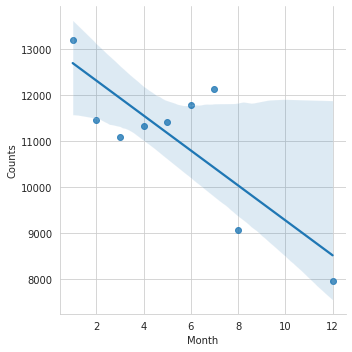

In [95]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.ylabel('Counts')

Creating a new column call '*Date*' that contains dates from the '*timeStamp*' column and plotting 911 calls against it. In particular 4 cases were investigated: the general one, Traffic, Fire and EMS.




In [97]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

Text(24.125, 0.5, 'Counts')

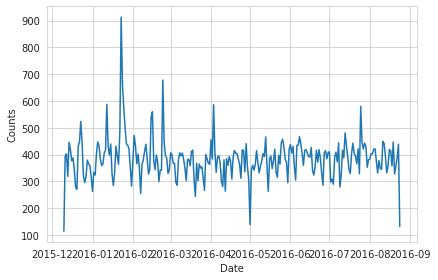

In [99]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.ylabel('Counts')


Text(24.125, 0.5, 'Counts')

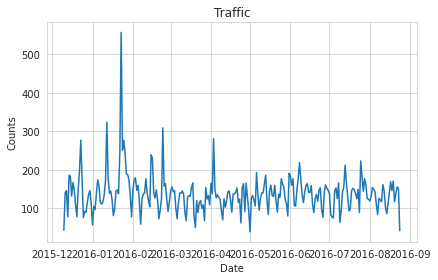

In [100]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()
plt.ylabel('Counts')

Text(24.0, 0.5, 'Counts')

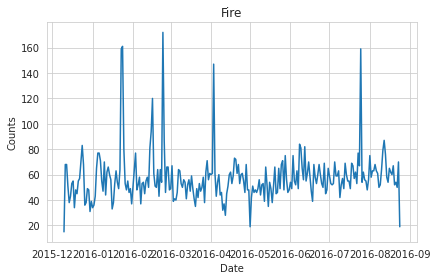

In [101]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()
plt.ylabel('Counts')

Text(23.875, 0.5, 'Counts')

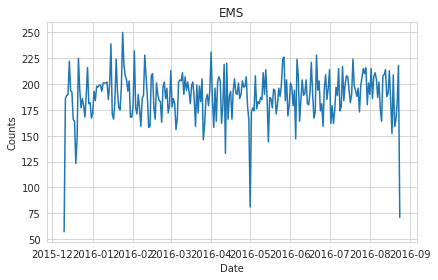

In [102]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
plt.ylabel('Counts')

### Heatmaps

Let's move on creating heatmaps using Seaborn. First, it is needed to restructure the dataframe so that the columns become the hours and the index becomes the day of the week

In [111]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()


Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


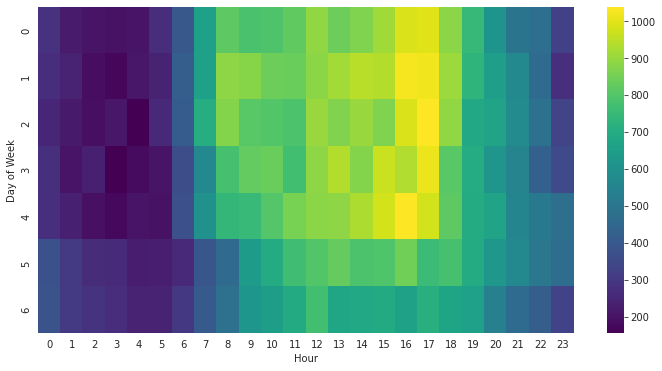

In [112]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

- Calls are more frequent in daily hours
- There are less calls in weekend

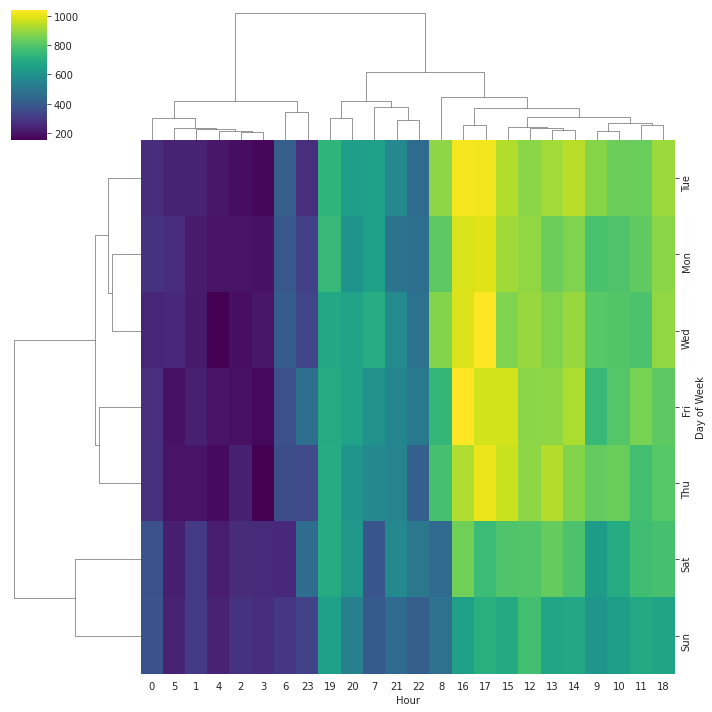

In [57]:
sns.clustermap(dayHour,cmap='viridis')

In [58]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


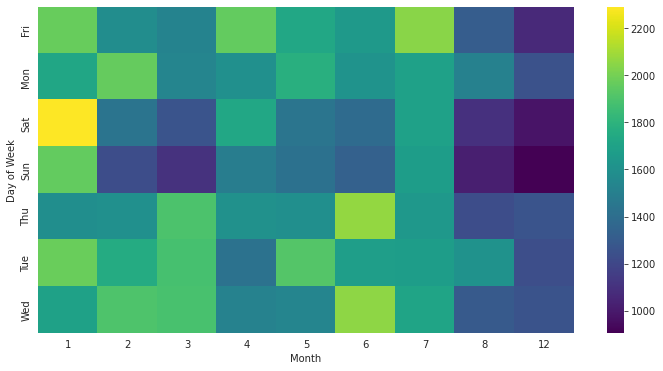

In [59]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

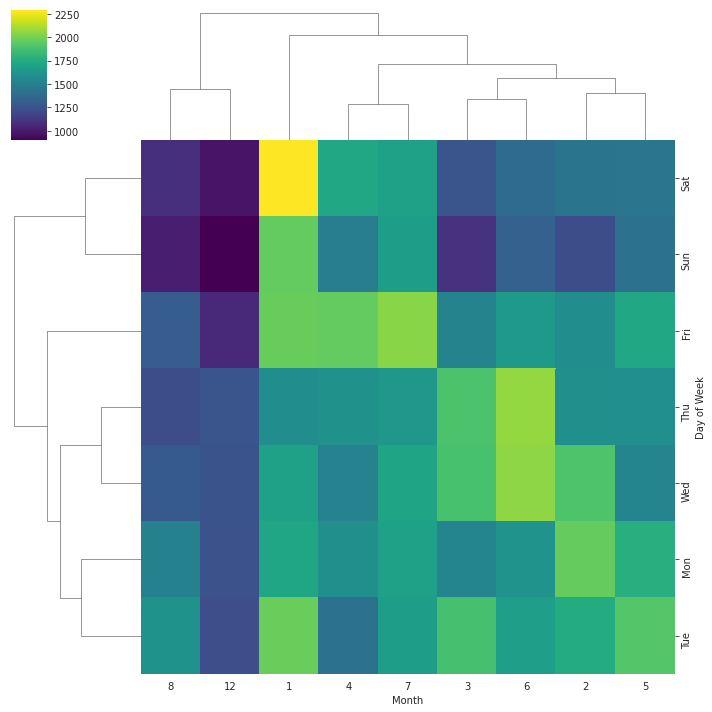

In [60]:
sns.clustermap(dayMonth,cmap='viridis')